<a href="https://colab.research.google.com/github/utkarshanand336/Data-Science-Projects/blob/main/CLTV_Using_LI_XGBOOST_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/train_BRCpofr.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/test_koRSKBP.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [4]:
test_df.head(5)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
train_df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [6]:
test_df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [7]:
train_df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
rows,col = train_df.shape[0], train_df.shape[1]
print("Number of rows in training", rows)
print("Number of cols in training", col)

Number of rows in training 89392
Number of cols in training 12


In [9]:
rows,col=test_df.shape[0],test_df.shape[1]
print('Number of rows in testing data:',rows)
print('Number of columns in testing data:',col)

Number of rows in testing data: 59595
Number of columns in testing data: 11


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [11]:
print("Number of nul values in training data", train_df.isnull().sum().sum())
print("Number of nul values in testing data", test_df.isnull().sum().sum())

Number of nul values in training data 0
Number of nul values in testing data 0


In [12]:
print("Number of unique values",train_df.dtypes.value_counts())

Number of unique values object    7
int64     5
dtype: int64


In [13]:
print('Unique values in training data:\n',train_df.nunique())

Unique values in training data:
 id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64


In [14]:
train_df = train_df.set_index('id')
test_df = test_df.set_index('id')

In [15]:
print("Setting ID")
train_df.head(5)

Setting ID


,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [16]:
print("Seperating categorical and Numerical columns")
num = [i for i in train_df.select_dtypes(exclude='object').columns]
cat = [i for i in train_df.select_dtypes(include='object').columns]
print("Categorical columns",cat)
print("Numerical columns",num)

Seperating categorical and Numerical columns
Categorical columns ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']
Numerical columns ['marital_status', 'vintage', 'claim_amount', 'cltv']


In [17]:
#plotting of graph
def cat_plot(feature,data=train_df):
    fig,axes = plt.subplots(1,2,figsize=(15,8))
    ax=axes[0]
    ax=plt.subplot(1,2,1)
    ax = sns.countplot(data=data,x=feature)
    for p in ax.patches:
        ax.text(p.get_x(),p.get_height(),p.get_height())
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.title('Counts')
    
    ax=axes[1]
    ax=plt.subplot(1,2,2)
    g = train_df.groupby(feature)['cltv'].median()
    ax = plt.bar(g.index,g.values,color=['blue','red','green','yellow','pink'])
    plt.bar_label(ax,label_type='center')
    plt.xlabel('Classes')
    plt.ylabel('Average clvt for the classes')
    plt.title('Relation with clvt')
    plt.show()
    
    return True

For feature gender:

----------------------------------------------------------------------------------------------------


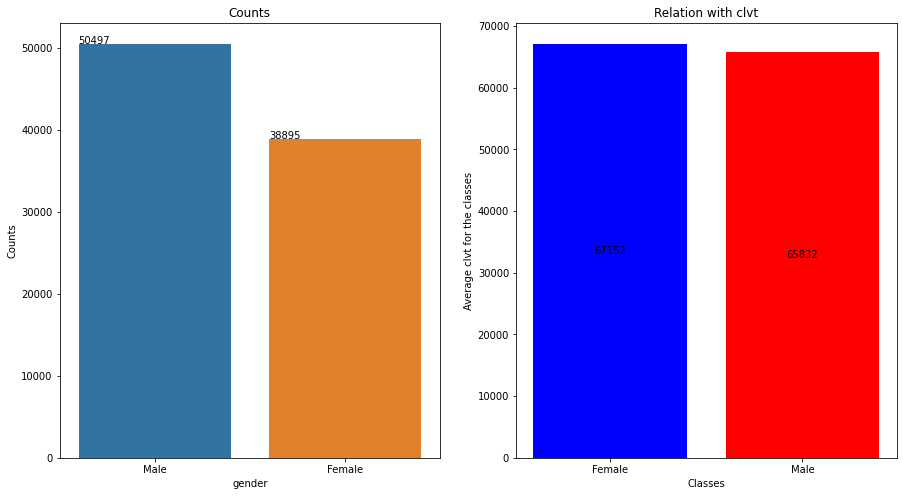

----------------------------------------------------------------------------------------------------
For feature area:

----------------------------------------------------------------------------------------------------


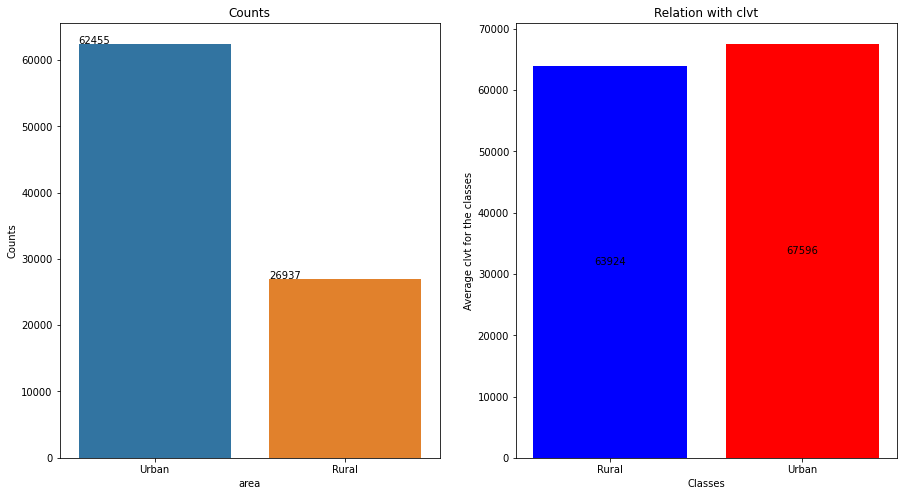

----------------------------------------------------------------------------------------------------
For feature qualification:

----------------------------------------------------------------------------------------------------


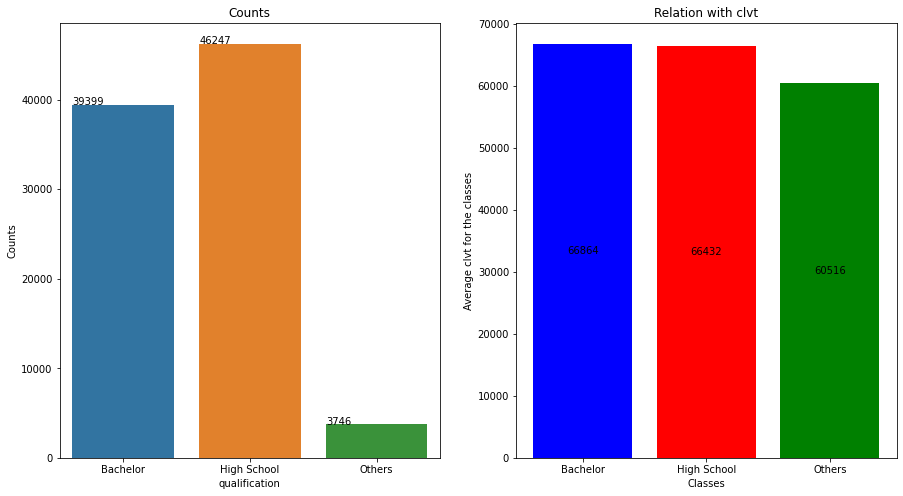

----------------------------------------------------------------------------------------------------
For feature income:

----------------------------------------------------------------------------------------------------


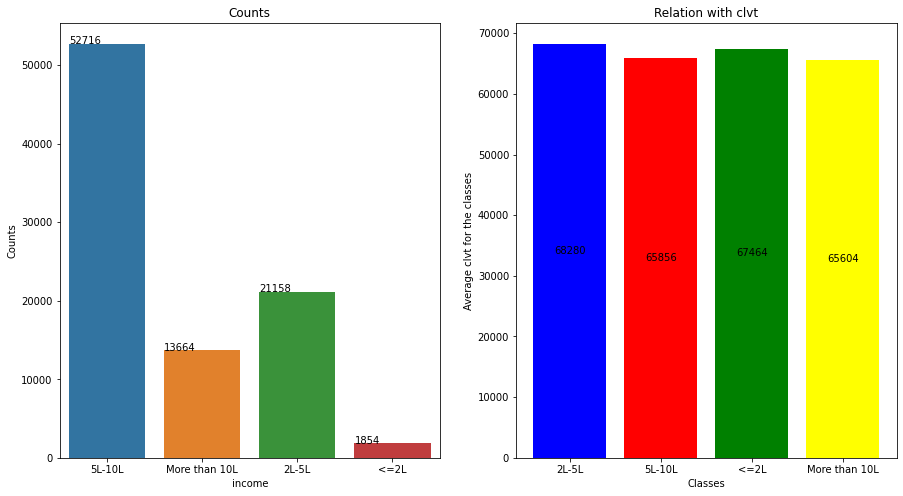

----------------------------------------------------------------------------------------------------
For feature num_policies:

----------------------------------------------------------------------------------------------------


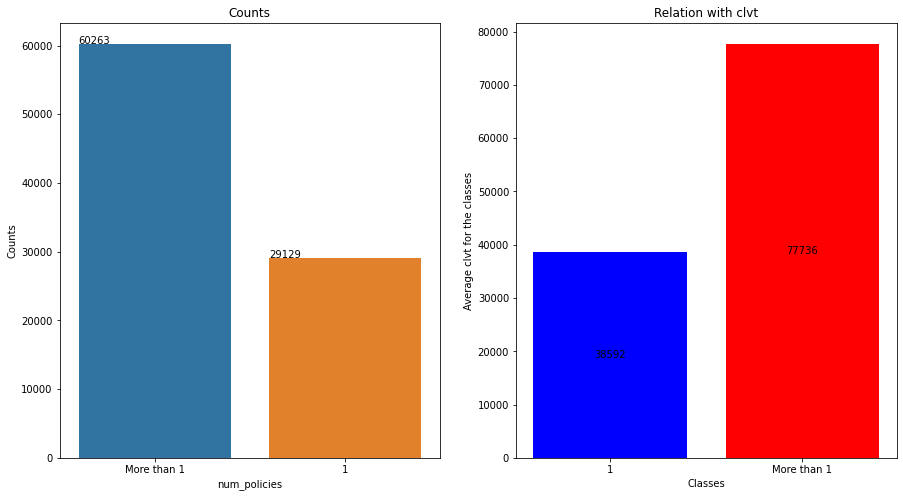

----------------------------------------------------------------------------------------------------
For feature policy:

----------------------------------------------------------------------------------------------------


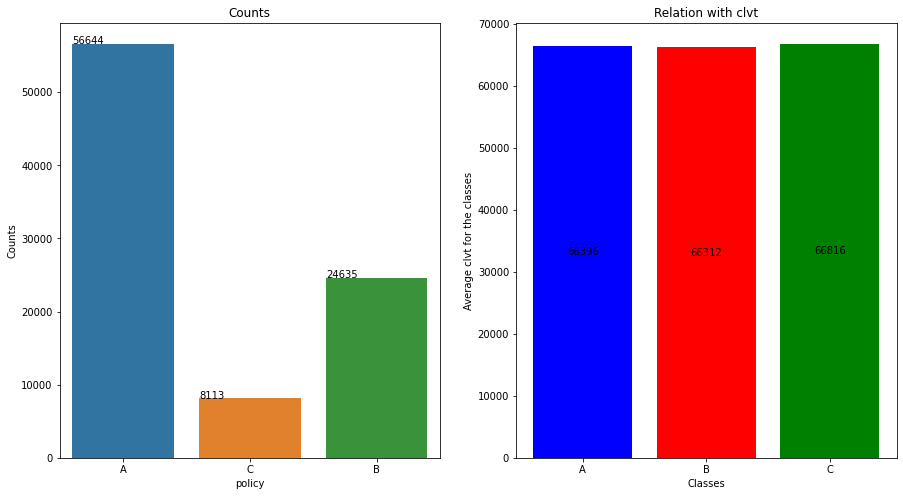

----------------------------------------------------------------------------------------------------
For feature type_of_policy:

----------------------------------------------------------------------------------------------------


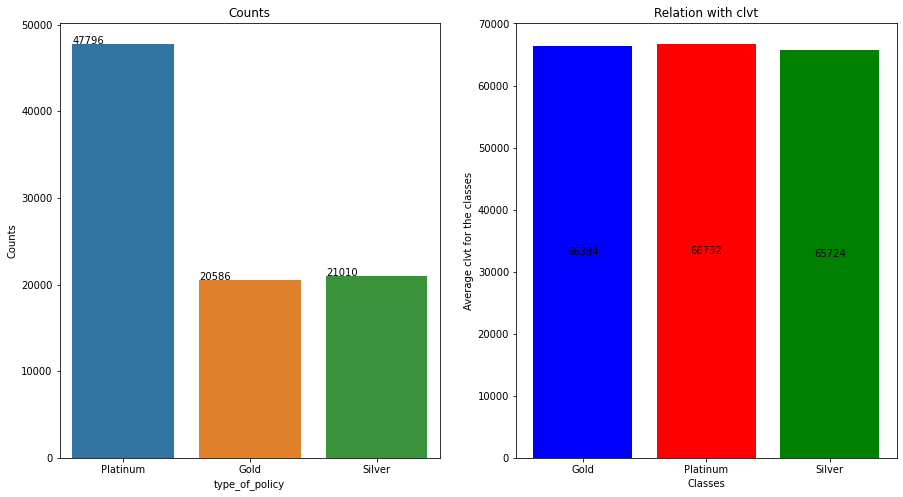

----------------------------------------------------------------------------------------------------
################################################Finished################################################


In [19]:
# Visualise Categorical Features
for feature in cat:
    print(''*50+'For feature {}:\n'.format(feature))
    print('-'*100)
    if cat_plot(feature):
        print('-'*100)
print('#'*48 +'Finished'+ '#'*48)

In [21]:
# for plotting numeric features
import random

def num_plot(feature,data=train_df):
    fig,axes = plt.subplots(1,2,figsize=(15,8))
    ax=axes[0]
    ax=plt.subplot(1,2,1)
    ax = sns.distplot(x=data[feature])
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.title('Distribution plot')
    
    color = ['blue','red','green','yellow','pink','orange']
    ax=axes[1]
    ax=plt.subplot(1,2,2)
    ax = plt.scatter(train_df[feature],train_df['cltv'],c=color[random.randint(0,5)])
    plt.xlabel(feature)
    plt.ylabel('CLVT')
    plt.title('Relation with clvt')
    plt.show()
    
    return True

For feature {feature}:

----------------------------------------------------------------------------------------------------


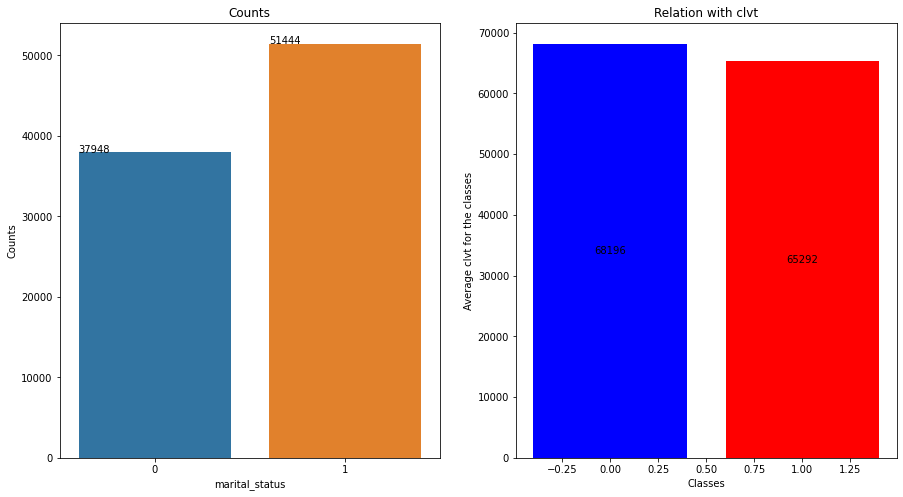

----------------------------------------------------------------------------------------------------
For feature {feature}:

----------------------------------------------------------------------------------------------------


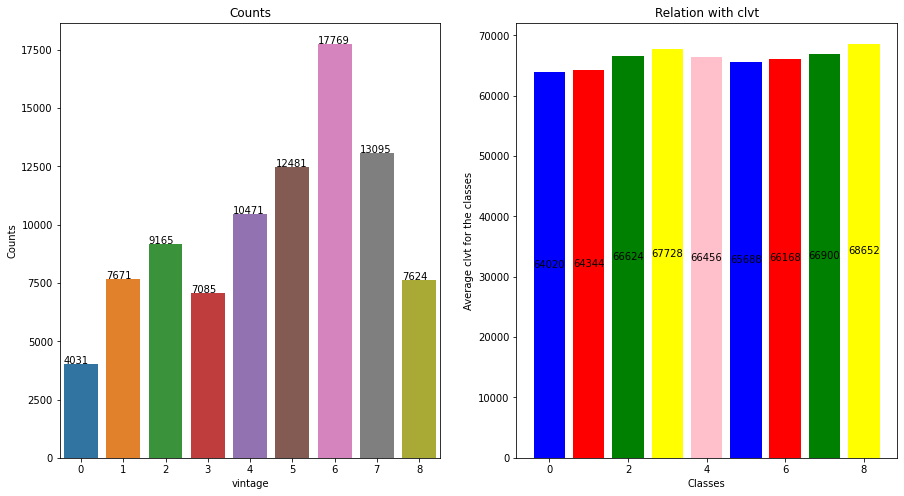

----------------------------------------------------------------------------------------------------
For feature {feature}:

----------------------------------------------------------------------------------------------------


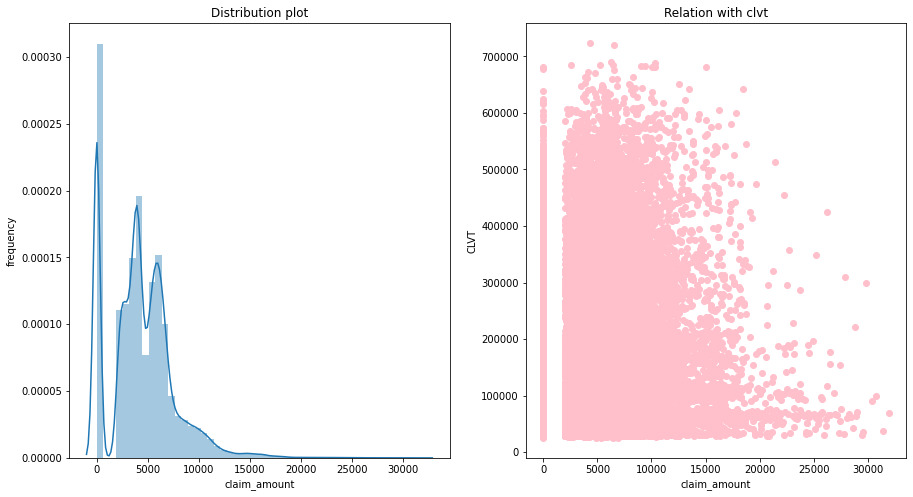

----------------------------------------------------------------------------------------------------
For feature {feature}:

----------------------------------------------------------------------------------------------------


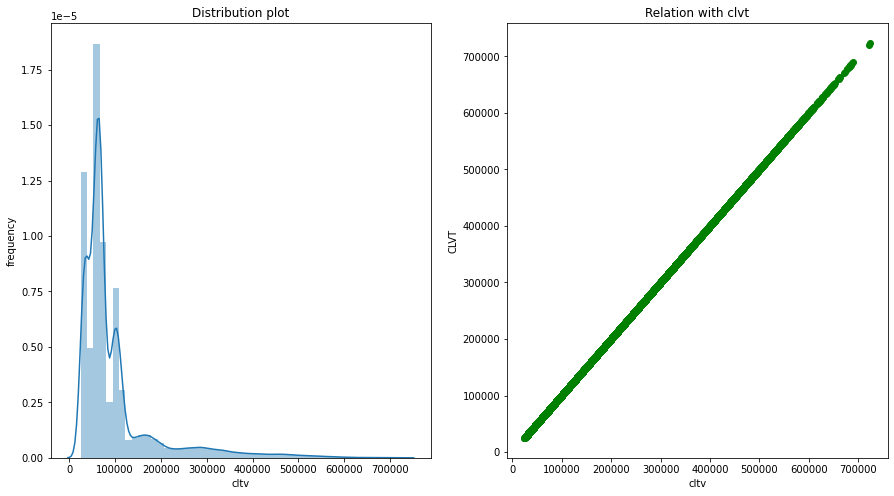

----------------------------------------------------------------------------------------------------
################################################Finished################################################


In [22]:
# Visualise Numerical Features
for feature in num:
    if train_df[feature].nunique()<10:
        print(f''*50+'For feature {feature}:\n')
        print('-'*100)
        if cat_plot(feature):
            print('-'*100)
        
    else:
        print(f''*50+'For feature {feature}:\n')
        print('-'*100)
        if num_plot(feature):
            print('-'*100)
print('#'*48 +'Finished'+ '#'*48)

In [25]:
# Print Standard Deviation of all numerical features
for i in num:
    print(f'Standard Deviation of {i} is  ----> {train_df[i].std()} ')

Standard Deviation of marital_status is  ----> 0.4942715186577733 
Standard Deviation of vintage is  ----> 2.290445718577817 
Standard Deviation of claim_amount is  ----> 3262.3597751914963 
Standard Deviation of cltv is  ----> 90613.81479334358 


<AxesSubplot: >

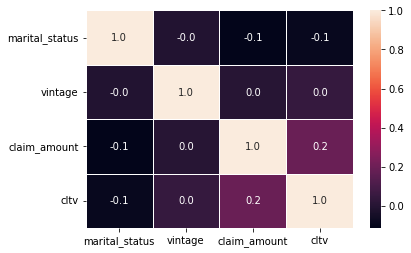

In [28]:
#Visualising Correlation matrix
mat = train_df.corr(method='spearman')
sns.heatmap(mat,annot=True,linewidths=1,fmt='.1f')

In [30]:
# Correlation with Categorical values
corr_dict = {}
for col in cat:
    corr = train_df['cltv'].corr(train_df[col], method='spearman')
    corr_dict[col] = corr
    
for feature,value in corr_dict.items():
    print(f'Correlation of {feature} with cltv is ----> {value}')

Correlation of gender with cltv is ----> -0.03517327160575323
Correlation of area with cltv is ----> 0.13173320853250184
Correlation of qualification with cltv is ----> -0.03628558857905113
Correlation of income with cltv is ----> -0.0676155067839568
Correlation of num_policies with cltv is ----> 0.6213982999511313
Correlation of policy with cltv is ----> -0.010516034094255462
Correlation of type_of_policy with cltv is ----> -0.025592671372610214


In [32]:
#Encoding further
print('Shape of training data before encoding: ',train_df.shape)
data = train_df.copy()
test = test_df.copy()
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Shape of training data after OneHot encoding: ',train_df.shape)

Shape of training data before encoding:  (89392, 23)
Shape of training data after OneHot encoding:  (89392, 23)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [34]:
X = train_df.drop('cltv',1)
y = train_df['cltv']

In [35]:
#Normalising data
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
#70:30 Split between training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [39]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.14972299173350012
Loss:  6917701177.267894


In [40]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.029211480454100935
Loss:  7898161210.11232


In [41]:
xgb = XGBRegressor(n_jobs=-1)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

[12:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:  0.15835534403260432
Loss:  6847469907.832712


In [ ]:
#stil performance is poor
#check what autoML suggests
!pip install flaml

In [ ]:
from flaml import AutoML
automl = AutoML()

automl.fit(x_train, y_train, task="regression",metric='r2',time_budget=360)

In [46]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 16, 'max_leaves': 9, 'min_child_weight': 39.88463190088666, 'learning_rate': 0.38918731352063796, 'subsample': 0.8694344376082428, 'colsample_bylevel': 0.9599733426973103, 'colsample_bytree': 0.5393236652609393, 'reg_alpha': 0.0012143429409783065, 'reg_lambda': 1.9892204375414062}
Best accuracy on validation data: 0.1654
Training duration of best run: 0.6881 s


In [ ]:
#Acc to automl, xgboost is best suited. time_budget given : 3600